# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Automated Anomaly Detection using Z-score method

**Steps**:
1. Data Set: Download a dataset representing daily sales figures for a retail store.
2. Calculate Z-score: Compute the mean and standard deviation of the sales. Use these to
calculate the Z-score for each day's sales figure.
3. Identify Anomalies: Detect anomalies by identifying values with a Z-score above 3 or below -3.
4. Visualize: Plot a graph to visualize anomalies.

     day  sales   z_score  anomaly
100  101  350.0  4.222887  Anomaly
101  102  400.0  5.659557  Anomaly
102  103  370.0  4.797555  Anomaly


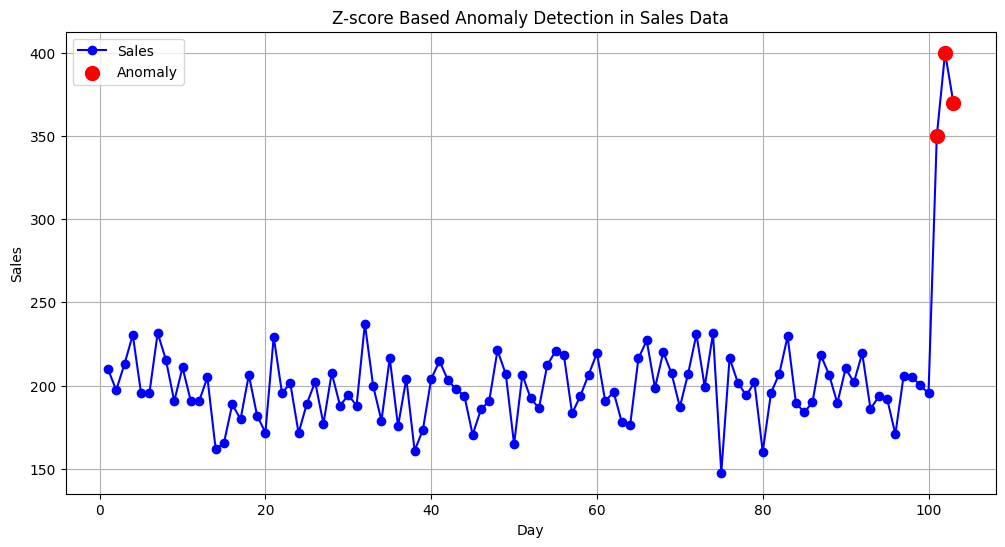

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Daily Sales Dataset
np.random.seed(42)

# Simulate 100 days of sales data with some anomalies
normal_sales = np.random.normal(loc=200, scale=20, size=100)
anomalies = np.array([350, 400, 370])  # Injecting 3 extreme values
sales_data = np.append(normal_sales, anomalies)

# Create DataFrame
df = pd.DataFrame({'day': range(1, len(sales_data) + 1), 'sales': sales_data})

# Step 2: Calculate Z-score
mean_sales = df['sales'].mean()
std_sales = df['sales'].std()

# Compute Z-score
df['z_score'] = (df['sales'] - mean_sales) / std_sales

# Step 3: Identify Anomalies (|Z| > 3)
df['anomaly'] = df['z_score'].apply(lambda x: 'Anomaly' if abs(x) > 3 else 'Normal')

# Show summary
print(df[df['anomaly'] == 'Anomaly'])

# Step 4: Plot Results
plt.figure(figsize=(12, 6))
plt.plot(df['day'], df['sales'], label='Sales', color='blue', marker='o')
plt.scatter(df[df['anomaly'] == 'Anomaly']['day'],
            df[df['anomaly'] == 'Anomaly']['sales'],
            color='red', label='Anomaly', zorder=5, s=100)
plt.title('Z-score Based Anomaly Detection in Sales Data')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()